**Welcome to Geospatial Data**

Using QGIS to demonstrate the understanding of spatial data `shapefile` such as atribute information, extent and etc. Also, it is very important to know the file extension of vector data such as `shapefile`. Please see here for all possible file extension [link](https://gdal.org/drivers/vector/index.html). 

In [1]:
import geopandas as gpd

# Read and Write Vector Data/shapefile

**Read shapefile**

Please access to this [website](https://gadm.org/download_country_v3.html) to download `Vietnam` maps.

In [6]:
# Read shapefile polygon

poly=gpd.read_file(r"F:\Research\Maps\Maps\VN_DIVA_GIS\gadm36_VNM_1.shp",encoding="utf-8")

poly.head()

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,VNM,Vietnam,VNM.1_1,An Giang,An Giang,None,Tỉnh,Province,None,VN.AG,"POLYGON ((105.37450 10.24604, 105.33623 10.234..."
1,VNM,Vietnam,VNM.2_1,Bạc Liêu,Bac Lieu,None,Tỉnh,Province,None,VN.BL,"POLYGON ((105.41638 9.01717, 105.41731 9.02926..."
2,VNM,Vietnam,VNM.3_1,Bắc Giang,Bac Giang,None,Tỉnh,Province,None,VN.BG,"POLYGON ((105.96444 21.23003, 105.96074 21.230..."
3,VNM,Vietnam,VNM.4_1,Bắc Kạn,Bac Kan,None,Tỉnh,Province,None,VN.BK,"POLYGON ((105.59045 22.00770, 105.58698 22.003..."
4,VNM,Vietnam,VNM.5_1,Bắc Ninh,Bac Ninh,None,Tỉnh,Province,None,VN.BN,"POLYGON ((106.02851 20.99314, 106.02468 20.996..."


In [7]:
# Read point shapefile
point=gpd.read_file(r"E:\Geospatial_R_ILRI\Study_Area\Mosquito_Count.shp")

point.head()

,ID,Lat,Long,District,Counts,geometry
0,03 - 016,21.095000,105.733611,Bac Tu Liem,0,MULTIPOINT (105.73361 21.09500)
1,03 - 015,21.094167,105.733889,Bac Tu Liem,1,MULTIPOINT (105.73389 21.09417)
2,03 - 014,21.094167,105.734167,Bac Tu Liem,4,MULTIPOINT (105.73417 21.09417)
3,03 - 013,21.093889,105.734444,Bac Tu Liem,23,MULTIPOINT (105.73444 21.09389)
4,03 - 008,21.093056,105.734444,Bac Tu Liem,0,MULTIPOINT (105.73444 21.09306)


**Read `geojson` file**

In [8]:
url = "https://gist.githubusercontent.com/tuyenhavan/5d0643ef2b49447492bd9047cb66ff5b/raw/46ee873c218d43482b9cb823aa5376cf96ab5aff/Germany.geojson"
df = gpd.read_file(url)
df.head()

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,DEU,Germany,DEU.1_1,Baden-W�rttemberg,None,None,Land,State,08,DE.BW,"MULTIPOLYGON (((8.70802 47.68958, 8.70766 47.6..."
1,DEU,Germany,DEU.2_1,Bayern,Bavaria,None,Freistaat,None,09,DE.BY,"POLYGON ((9.74066 47.55354, 9.74058 47.55311, ..."
2,DEU,Germany,DEU.3_1,Berlin,None,None,Land,State,11,DE.BE,"POLYGON ((13.17136 52.39776, 13.17135 52.39770..."
3,DEU,Germany,DEU.4_1,Brandenburg,None,None,Land,State,12,DE.BR,"MULTIPOLYGON (((12.26716 52.23131, 12.27047 52..."
4,DEU,Germany,DEU.5_1,Bremen,None,None,Freie Hansestadt,State,04,DE.HB,"MULTIPOLYGON (((8.71142 53.04463, 8.71033 53.0..."


In [10]:
# Select capital city of Berlin
berlin=df.iloc[2:3,:]

berlin

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
2,DEU,Germany,DEU.3_1,Berlin,None,None,Land,State,11,DE.BE,"POLYGON ((13.17136 52.39776, 13.17135 52.39770..."


- More reading vector files can be found [here](https://geopandas.org/docs/user_guide/io.html)

**Writing vector files**

- *Write to shapefile*

In [11]:
# Write shapefile to shapefile
store=r"E:\Spatial_Decision\Test_Geopandas\VN.shp"

poly.to_file(store)

- *Write to GeoJSON*

In [12]:
# Write shapefile to geojson
df=gpd.read_file(r"F:\Research\Maps\Germany_Map\gadm36_DEU_1.shp")
store=r"E:\Spatial_Decision\Test_Geopandas\Germany.geojson"
df.to_file(store, driver="GeoJSON")

In [98]:
## It throws error when writing VN map
store=r"E:\Spatial_Decision\Test_Geopandas\VN.geojson"
# poly.to_file(store, driver="GeoJSON", endcoding="utf-8")

In [ ]:
# Work around to convert VN maps to GeoJSON
# First to conver geopandas shapefile to geojson
df_json=poly.to_json()
# # # Finally write text contents to store file as GeoJSON
with open(store,"w") as wf:
    wf.write(df_json)

- *Write to geopackage*

In [8]:
store=r"E:\Spatial_Decision\Test_Geopandas\VN.gpkg"

poly.to_file(store,layer="VN", driver="GPKG")

# Shapefile Information

What we should know about the properities of a shapefile. There are some information that we should know to better work with vector data such as `coordinate system`.

**Check coordinate system**

In [9]:
poly=gpd.read_file(r"F:\Research\Maps\Maps\VN_DIVA_GIS\gadm36_VNM_1.shp",encoding="utf-8")
# Print out the coordinate information
poly.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
# See the coordinate system code
poly.crs.to_epsg()
# Other way around
str(poly.crs)

'epsg:4326'

**Work example**

List all files with coordinates.

In [11]:
path=r"E:\Python_Tutorials\Practice_Data"
import os
# Check crs if any missing

for file in os.listdir(path):
    
    if file.endswith(".shp"):
        link=os.path.join(path,file)
        layer=gpd.read_file(link)
        mycrs=layer.crs.to_epsg()
#         print(file)
        if mycrs:
            print(f"{file}:{mycrs}")
# #         else:
#             print(f"{file}")

Diemthugom.shp:32648
Khuthugomrac.shp:3405
SQD.shp:4326


**Change coordinate or reprojection**

In [14]:
# You can do like this
VN_UTM=poly.to_crs("EPSG:32648")

print(VN_UTM.crs.to_epsg())
# We can export new shapefile
store=r"E:\Spatial_Decision\Test_Geopandas\VN.shp"

VN_UTM.to_file(store)

32648


- Calculate area of a polygon

In [15]:
VN_UTM["Area"]=VN_UTM.area/1000000 # Unit: Km2

VN_UTM.head()

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry,Area
0,VNM,Vietnam,VNM.1_1,An Giang,An Giang,None,Tỉnh,Province,None,VN.AG,"POLYGON ((541012.990 1132639.201, 536822.496 1...",3522.233281
1,VNM,Vietnam,VNM.2_1,Bạc Liêu,Bac Lieu,None,Tỉnh,Province,None,VN.BL,"POLYGON ((545764.414 996776.503, 545865.190 99...",2477.306698
2,VNM,Vietnam,VNM.3_1,Bắc Giang,Bac Giang,None,Tỉnh,Province,None,VN.BG,"POLYGON ((600082.174 2347911.498, 599698.069 2...",3892.812674
3,VNM,Vietnam,VNM.4_1,Bắc Kạn,Bac Kan,None,Tỉnh,Province,None,VN.BK,"POLYGON ((560943.873 2433797.123, 560588.128 2...",4859.485955
4,VNM,Vietnam,VNM.5_1,Bắc Ninh,Bac Ninh,None,Tỉnh,Province,None,VN.BN,"POLYGON ((606901.112 2321732.321, 606500.938 2...",820.901696


In [16]:
# Get geometry types
poly.geom_type[0]

'Polygon'

In [17]:
# Get bounds for each feature
poly.bounds.head()

,minx,miny,maxx,maxy
0,104.778381,10.183551,105.575272,10.962068
1,105.232574,9.017170,105.860481,9.637449
2,105.880775,21.121574,107.033577,21.626274
3,105.431129,21.804462,106.247055,22.741526
4,105.902649,20.969311,106.310631,21.264307


In [18]:
# Get total bounds 
poly.total_bounds

array([102.14458466,   8.38135529, 109.46916962,  23.39269257])

- Centroids

Also, you can get a representative point for each polygon `representative_point()`

In [19]:
VN_UTM["polyCentroid"]=VN_UTM.centroid

VN_UTM.head()

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry,Area,polyCentroid
0,VNM,Vietnam,VNM.1_1,An Giang,An Giang,None,Tỉnh,Province,None,VN.AG,"POLYGON ((541012.990 1132639.201, 536822.496 1...",3522.233281,POINT (519986.562 1161931.668)
1,VNM,Vietnam,VNM.2_1,Bạc Liêu,Bac Lieu,None,Tỉnh,Province,None,VN.BL,"POLYGON ((545764.414 996776.503, 545865.190 99...",2477.306698,POINT (553726.762 1029585.362)
2,VNM,Vietnam,VNM.3_1,Bắc Giang,Bac Giang,None,Tỉnh,Province,None,VN.BG,"POLYGON ((600082.174 2347911.498, 599698.069 2...",3892.812674,POINT (653546.119 2362449.083)
3,VNM,Vietnam,VNM.4_1,Bắc Kạn,Bac Kan,None,Tỉnh,Province,None,VN.BK,"POLYGON ((560943.873 2433797.123, 560588.128 2...",4859.485955,POINT (585193.773 2461975.214)
4,VNM,Vietnam,VNM.5_1,Bắc Ninh,Bac Ninh,None,Tỉnh,Province,None,VN.BN,"POLYGON ((606901.112 2321732.321, 606500.938 2...",820.901696,POINT (614868.373 2334631.289)


**Set projection**

If a shapefile has `No` CRS, we have to assign a crs to it.

In [20]:
newPath=os.path.join(path,"DiemDoCao-QTQV.shp")
docao=gpd.read_file(newPath)
# Check the coordinate 
print(docao.crs.to_epsg())

None


In [22]:
# Set crs docao layer
new_data=docao.set_crs("EPSG:4326",allow_override=True)

print(new_data.crs.to_epsg())

4326


## Shapefile information

In [110]:
# Check the geometry name
poly.geometry.name

'geometry'

In [23]:
# Change the geometry name
newgeometry = poly.rename(columns={'geometry': 'borders'}).set_geometry('borders') # becareful with this
newgeometry.head()

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,borders
0,VNM,Vietnam,VNM.1_1,An Giang,An Giang,None,Tỉnh,Province,None,VN.AG,"POLYGON ((105.37450 10.24604, 105.33623 10.234..."
1,VNM,Vietnam,VNM.2_1,Bạc Liêu,Bac Lieu,None,Tỉnh,Province,None,VN.BL,"POLYGON ((105.41638 9.01717, 105.41731 9.02926..."
2,VNM,Vietnam,VNM.3_1,Bắc Giang,Bac Giang,None,Tỉnh,Province,None,VN.BG,"POLYGON ((105.96444 21.23003, 105.96074 21.230..."
3,VNM,Vietnam,VNM.4_1,Bắc Kạn,Bac Kan,None,Tỉnh,Province,None,VN.BK,"POLYGON ((105.59045 22.00770, 105.58698 22.003..."
4,VNM,Vietnam,VNM.5_1,Bắc Ninh,Bac Ninh,None,Tỉnh,Province,None,VN.BN,"POLYGON ((106.02851 20.99314, 106.02468 20.996..."


**Plot map**

In [24]:
import random

poly["elev"]=[i+random.random() for i in range(len(poly))]
poly.head()

poly.to_file(r"E:\Spatial_Decision\Test_Geopandas\test.shp")

<AxesSubplot:>

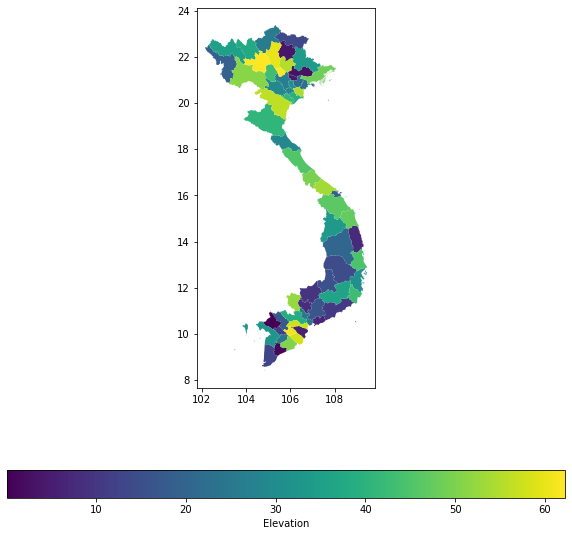

In [25]:
# fig, ax = plt.subplots(1, 1)
poly.plot(column="elev",legend=True, figsize=(10,10),legend_kwds={'label': "Elevation",'orientation': "horizontal"})